In [1]:
%run InitAndFuctions.ipynb

Host: 84d2a542adf9
3.6.8 (default, Nov 16 2020, 16:55:22) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-44)] <ipykernel.zmqshell.ZMQInteractiveShell object at 0x7fd16335b630>
Welcome to JupyROOT 6.22/06


In [2]:
#!ls ../out/cosmics_run4039_cmin_0_cmax_10_rescale_576_nsigma_0.5_ev_200_ped_4038_ms*

# analisi

In [3]:
file_out=mybasepath+"out/cosmics_run4035_cmin_0_cmax_10_rescale_576_nsigma_0.5_ev_100_ped_4034.plk.gz"
file_out=mybasepath+"out/cosmics_run4045_cmin_0_cmax_10_rescale_576_nsigma_0.5_ev_200_ped_4038_ms_2_rt_3_vL.1.plk.gz"
file_out=mybasepath+"out/cosmics_run4045_cmin_0_cmax_500_rescale_576_nsigma_0.5_ev_200_ped_4038_ms_2_rt_2_vL.1.plk.gz"
df = pd.read_pickle(file_out, compression='gzip')
fileInfo = FileNameInfo(file_out)
df['x0c'] = (df['x0end'] + df['x0start'])/2.
df['y0c'] = (df['y0end'] + df['y0start'])/2.


In [4]:
fileInfo

,cosmics,cmin,cmax,rescale,nsigma,ev,ped,ms,rt,version
0,run4045,0,500,576,0.5,200,4038,2,2,vL.1.plk.gz


In [5]:
run_info_logbook(int(fileInfo.cosmics[0].split('run')[-1]), verbose=False)

File_Number                                        4045
saved_events                                        200
Exposure_Time_ms                                      1
comments                          55Fe - Z = 36-1=35 cm
Nominal_Flux_He_CF4                               60/40
He_CF4                                              NaN
Transfer_field_kV_cm                                2.5
GEM3_V                                              430
GEM2_V                                              440
GEM1_V                                              440
Calculated_GEM_stack_V                             1315
Requested_Drift_field_V_cm                          960
Calculated_Field_Cage_Anode_V                     316.8
Real_Field_Cage_Anode_V                             317
Calculated_Field_Cage_Catode_V                    49632
Calculated_Drift_Field_V_cm                     960.004
Name: 2967, dtype: object

In [6]:
df

,iTr,cluster_lable,pixels,photons,ph_pixels,x0start,y0start,x0end,y0end,length,mse,r2,x0c,y0c
0,0.0,0.0,7648.0,29620.125,3.872924,1740.0,164.0,292.0,2132.0,2443.302683,1.713454,0.999671,1016.0,1148.0
1,0.0,1.0,9120.0,37121.675,4.070359,1876.0,148.0,520.0,2140.0,2409.730275,1.567562,0.999672,1198.0,1144.0
2,0.0,2.0,7200.0,28365.275,3.939622,2148.0,808.0,1528.0,2152.0,1480.113509,1.384423,0.999319,1838.0,1480.0
3,0.0,3.0,4560.0,14134.240,3.099614,1304.0,164.0,1932.0,2116.0,2050.533589,1.327180,0.998411,1618.0,1140.0
4,0.0,4.0,4672.0,13479.930,2.885259,2144.0,228.0,548.0,2152.0,2499.798392,2.263116,0.999625,1346.0,1190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,199.0,15.0,2624.0,8216.185,3.131168,216.0,188.0,1852.0,2136.0,2543.855342,1.969545,0.999821,1034.0,1162.0
3996,199.0,16.0,2656.0,9215.840,3.469819,2116.0,1520.0,388.0,1580.0,1729.041353,1842.567052,0.906389,1252.0,1550.0
3997,199.0,17.0,2704.0,9150.100,3.383913,204.0,220.0,2112.0,420.0,1918.453544,109.389096,0.992323,1158.0,320.0
3998,199.0,18.0,2640.0,12439.050,4.711761,1184.0,444.0,1172.0,2148.0,1704.042253,1.162272,0.515898,1178.0,1296.0


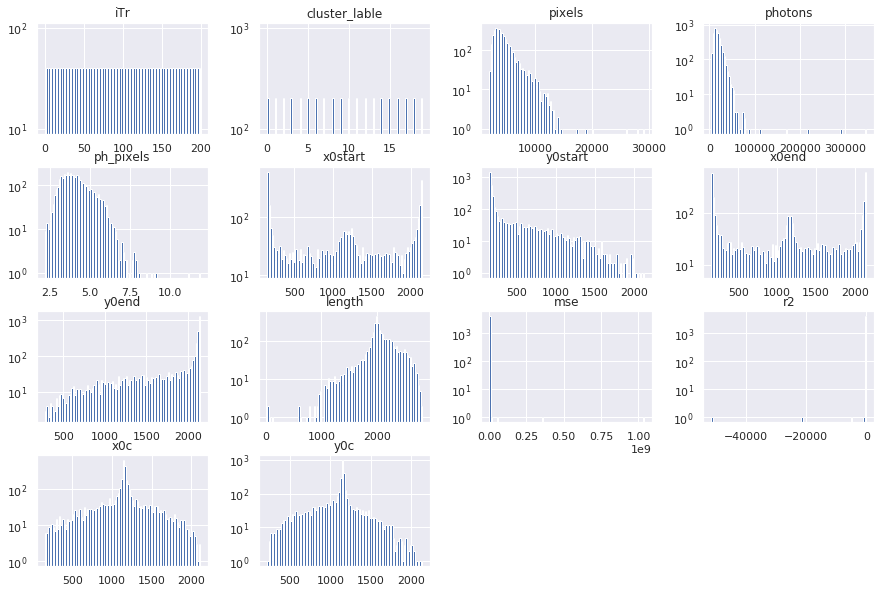

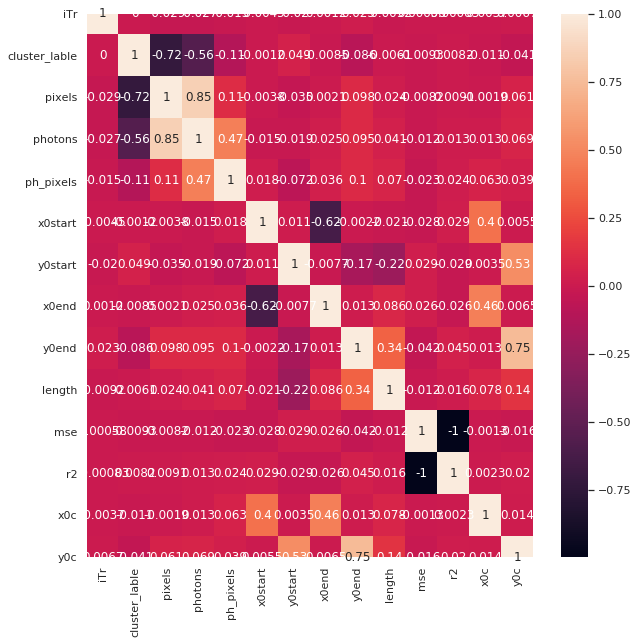

In [7]:
import seaborn as sns
sns.set()
#
# Visulizza tutte le Varibili
#
df.hist(bins=100, figsize=(15,10), log=True)
plt.show()

plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

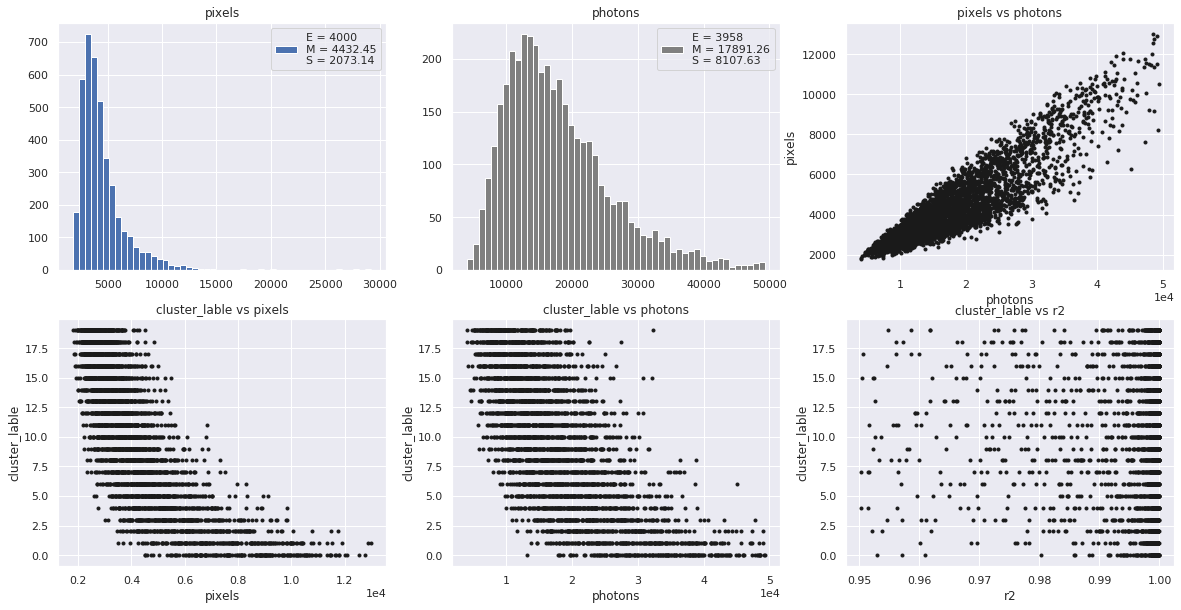

In [8]:
fig, ax = plt.subplots(2,3, figsize=(20,10))
pd_his_plot(df.pixels, ax=ax[0, 0], bins=50)
phmax=50000
pd_his_plot(df.photons[(df.photons<phmax)], ax=ax[0, 1], bins=50, color="gray")
ax[0, 2].set_title('pixels vs photons')
ax[0, 2].plot(df.photons[df.photons<phmax].values, df.pixels[df.photons<phmax].values, 'k.')
ax[0, 2].set_xlabel('photons')
ax[0, 2].set_ylabel('pixels')
ax[0, 2].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
ax[1, 0].set_title('cluster_lable vs pixels')
ax[1, 0].plot(df.pixels[df.photons<phmax].values, df.cluster_lable[df.photons<phmax].values, 'k.')
ax[1, 0].set_xlabel('pixels')
ax[1, 0].set_ylabel('cluster_lable')
ax[1, 0].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
ax[1, 1].set_title('cluster_lable vs photons')
ax[1, 1].plot(df.photons[df.photons<phmax].values, df.cluster_lable[df.photons<phmax].values, 'k.')
ax[1, 1].set_xlabel('photons')
ax[1, 1].set_ylabel('cluster_lable')
ax[1, 1].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
ax[1, 2].set_title('cluster_lable vs r2')
ax[1, 2].plot(df.r2[df.r2>0.95].values, df.cluster_lable[df.r2>0.95].values, 'k.')
ax[1, 2].set_xlabel('r2')
ax[1, 2].set_ylabel('cluster_lable')
ax[1, 2].ticklabel_format(axis="x", style="sci", scilimits=(0,0))

#ax[0].set_yscale('log')
#ax[1].set_yscale('log')
plt.show()

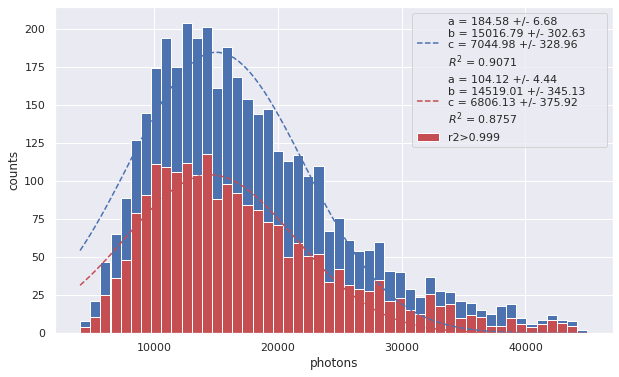

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
histGaus(df.photons, 50, ax, color='b', xrange=(4000,45000), alpha=1, label='')
histGaus(df.photons[df.r2>0.999], 50, ax, color='r', xrange=(4000,45000), alpha=1, label='r2>0.999')
plt.xlabel('photons')
plt.ylabel('counts')
plt.legend()
plt.show()

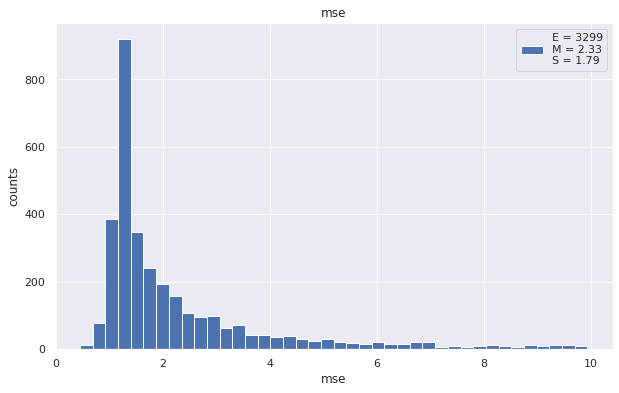

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
pd_his_plot(df.mse[(df.mse>0) & (df.mse<10) ], ax=ax, bins=40)
#histGaus(df.mse, 40, ax, color='b', xrange=(0.,10), alpha=1, label='')
plt.xlabel('mse')
plt.ylabel('counts')
plt.legend()
plt.show()

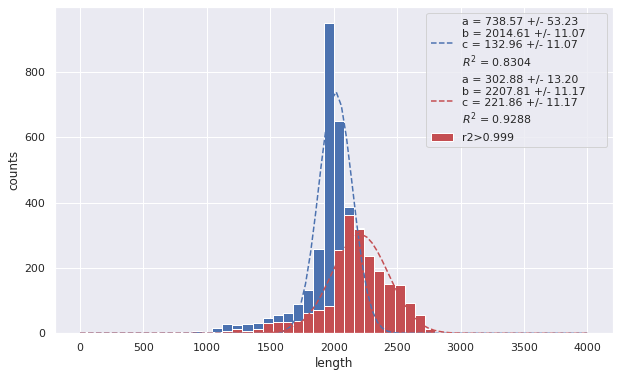

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
histGaus(df.length, 50, ax, color='b', xrange=(0,4000), alpha=1, label='')
histGaus(df.length[df.r2>0.999], 50, ax, color='r', xrange=(0,4000), alpha=1, label='r2>0.999')
plt.xlabel('length')
plt.ylabel('counts')
plt.legend()
plt.show()

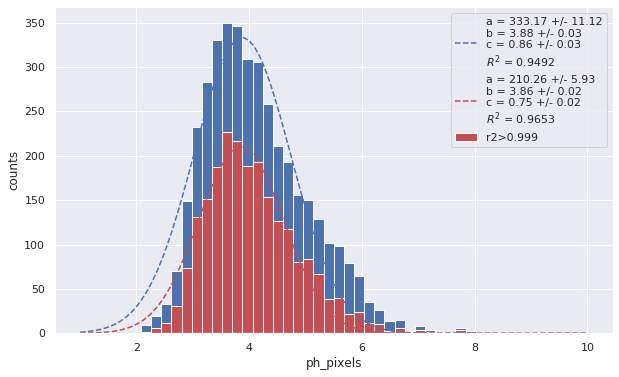

In [12]:
fig, ax = plt.subplots(figsize=(10,6))
histGaus(df.ph_pixels, 50, ax, color='b', xrange=(1,10), alpha=1, label='')
histGaus(df.ph_pixels[df.r2>0.999], 50, ax, color='r', xrange=(1,10), alpha=1, label='r2>0.999')
plt.xlabel('ph_pixels')
plt.ylabel('counts')
plt.legend()
plt.show()

No handles with labels found to put in legend.


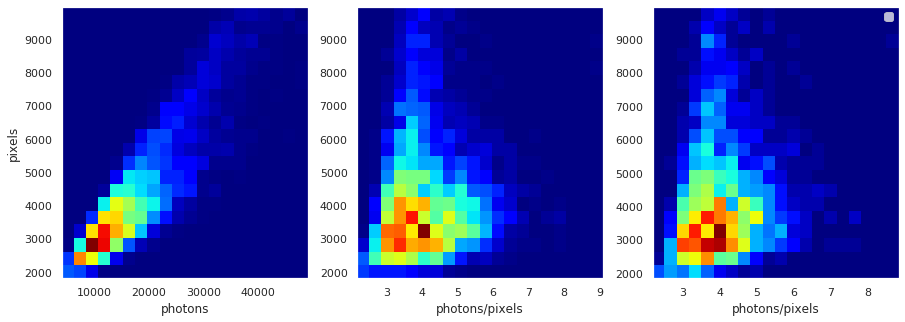

In [13]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
mpixe = 10000
mph   = 50000
mpphp_p = 10
ax[0].hist2d(df.photons.values[((df.pixels<mpixe)&(df.photons<mph))], 
           df.pixels.values[((df.pixels<mpixe)&(df.photons<mph))], 
           bins=(20,20), cmap=plt.cm.jet)
ax[0].set_xlabel("photons")
ax[0].set_ylabel("pixels")
ax[1].hist2d(df.ph_pixels.values[((df.pixels<mpixe)&(df.ph_pixels<mpphp_p))], 
           df.pixels.values[((df.pixels<mpixe)&(df.ph_pixels<mpphp_p))], 
           bins=(20,20), cmap=plt.cm.jet)
ax[1].set_xlabel("photons/pixels")
ax[2].hist2d(df.ph_pixels.values[((df.pixels<mpixe)&(df.ph_pixels<mpphp_p)&(df.r2>0.999))], 
           df.pixels.values[((df.pixels<mpixe)&(df.ph_pixels<mpphp_p)&(df.r2>0.999))], 
           bins=(20,20), cmap=plt.cm.jet, label='r2>0.999')
ax[2].set_xlabel("photons/pixels")
ax[2].legend()
plt.show()

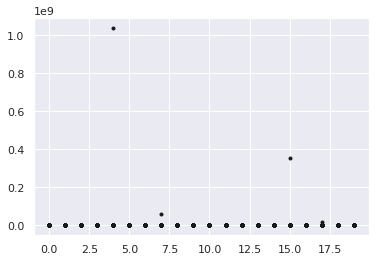

In [14]:
plt.plot(df.cluster_lable.values, df.mse.values, 'k.')
plt.show()

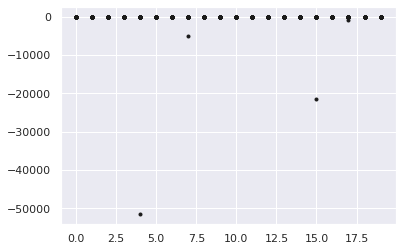

In [15]:
plt.plot(df.cluster_lable.values, df.r2.values, 'k.')
plt.show()

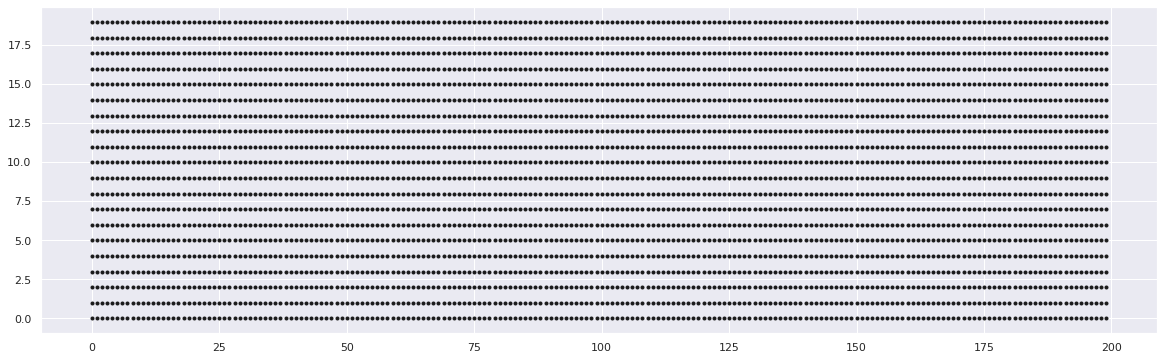

In [16]:
fig, ax = plt.subplots(figsize=(20,6))
plt.plot(df.iTr.values, df.cluster_lable.values, 'k.')
plt.show()

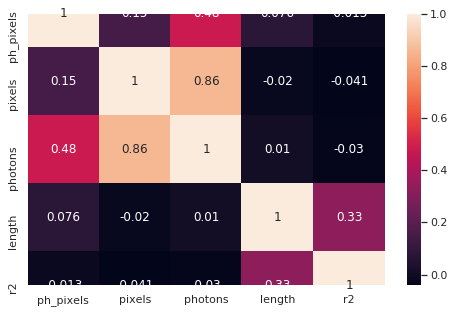

,ph_pixels,pixels,photons,length,r2
ph_pixels,1.000000,0.149444,0.477454,0.075733,-0.012809
pixels,0.149444,1.000000,0.861095,-0.020031,-0.041424
photons,0.477454,0.861095,1.000000,0.010050,-0.029624
length,0.075733,-0.020031,0.010050,1.000000,0.329903
r2,-0.012809,-0.041424,-0.029624,0.329903,1.000000


In [17]:
import seaborn as sns
# pixels	photons	ph_pixels	x0start	y0start	x0end	y0end	length	mse	r2
features = df[['ph_pixels', 'pixels', 'photons', 'length', 'r2']][(df.r2>0.99)].copy()
plt.figure(figsize = (8,5))
sns.heatmap(features.corr(), annot=True)
plt.show()

features.corr()

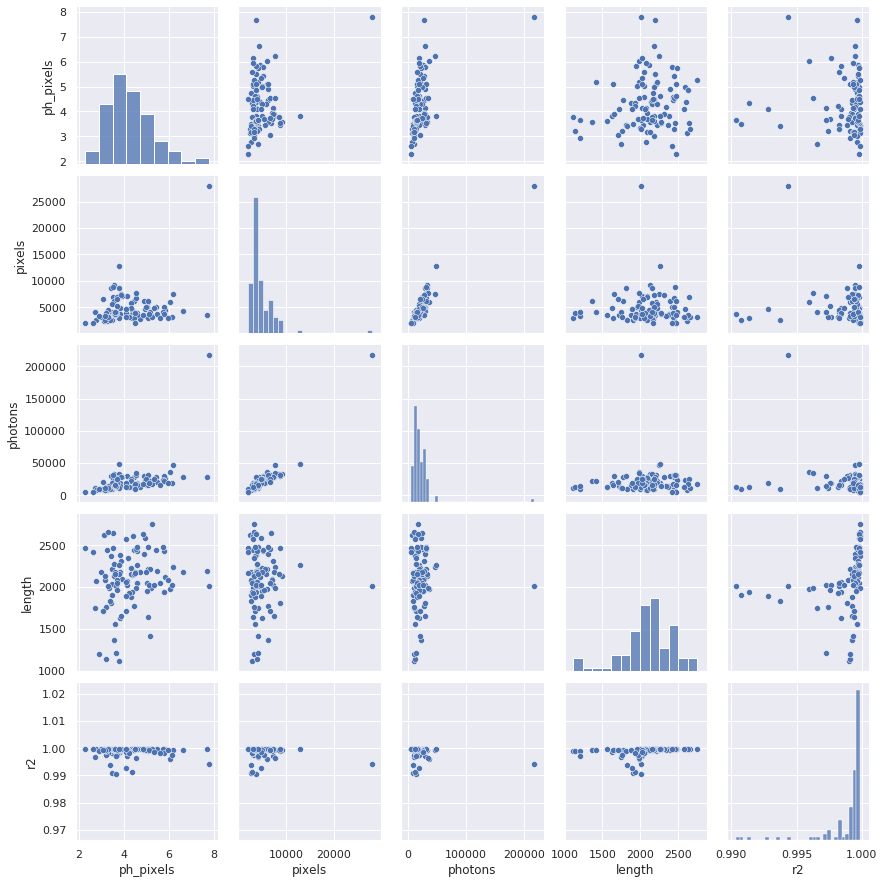

In [18]:
sns.pairplot(features.sample(100))
plt.show()

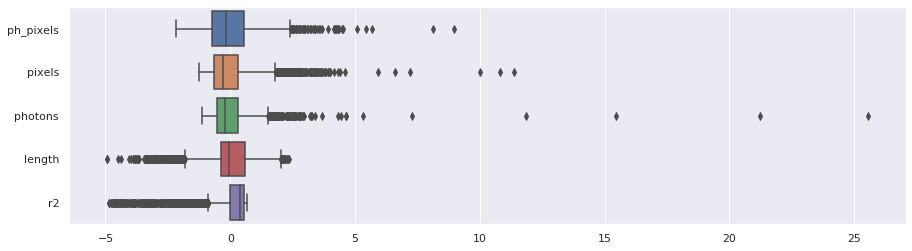

,ph_pixels,pixels,photons,length,r2
count,3.177000e+03,3.177000e+03,3.177000e+03,3.177000e+03,3.177000e+03
mean,-8.006745e-16,-9.840693e-17,1.252452e-16,5.591303e-17,6.914093e-14
std,1.000157e+00,1.000157e+00,1.000157e+00,1.000157e+00,1.000157e+00
min,-2.166976e+00,-1.241827e+00,-1.145253e+00,-4.954525e+00,-4.868362e+00
25%,-7.161678e-01,-6.594526e-01,-5.266597e-01,-3.810206e-01,-2.662552e-02
50%,-1.536882e-01,-2.761176e-01,-1.915708e-01,-3.989596e-02,4.089833e-01
75%,5.323056e-01,3.283724e-01,2.916957e-01,5.859630e-01,5.425798e-01
max,8.953750e+00,1.138612e+01,2.553413e+01,2.371226e+00,6.619322e-01


In [19]:
# normalizzazione delle variabili

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_array = scaler.fit_transform(features)
# pixels	photons	ph_pixels	x0start	y0start	x0end	y0end	length	mse	r2
scaled_dataframe = pd.DataFrame( scaled_array, columns = features.columns ) # df.colums per tutte e colonne
plt.figure(figsize = (15,4))
sns.boxplot(data = scaled_dataframe, orient = "h")
plt.show()
scaled_dataframe.describe()

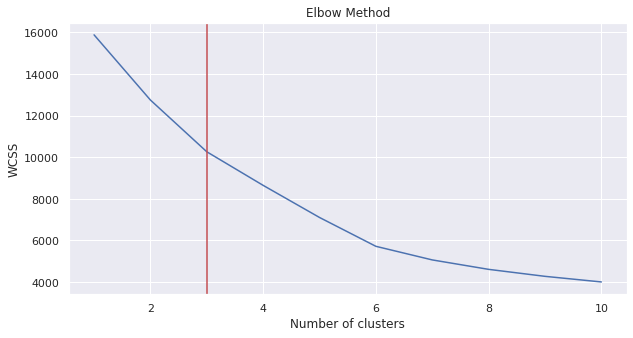

In [20]:
from sklearn.cluster import KMeans
plt.figure(figsize = (10,5))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_dataframe)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.axvline(3, color = "r")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
from sklearn import metrics
k_to_test = range(2,25,1) # [2,3,4, ..., 24]
silhouette_scores = []

for k in k_to_test:
    model_kmeans_k = KMeans( n_clusters = k )
    model_kmeans_k.fit(scaled_dataframe)
    labels_k = model_kmeans_k.labels_
    score_k = metrics.silhouette_score(scaled_dataframe, labels_k)
    silhouette_scores.append(score_k)
    print("Tested kMeans with k = %d\tSS: %5.4f" % (k, score_k))
    
print("Done!")

Tested kMeans with k = 2	SS: 0.3089
Tested kMeans with k = 3	SS: 0.3007
Tested kMeans with k = 4	SS: 0.2974
Tested kMeans with k = 5	SS: 0.2701
Tested kMeans with k = 6	SS: 0.3019
Tested kMeans with k = 7	SS: 0.2672
Tested kMeans with k = 8	SS: 0.2600
Tested kMeans with k = 9	SS: 0.2534
Tested kMeans with k = 10	SS: 0.2544
Tested kMeans with k = 11	SS: 0.2540
Tested kMeans with k = 12	SS: 0.2476
Tested kMeans with k = 13	SS: 0.2451
Tested kMeans with k = 14	SS: 0.2522
Tested kMeans with k = 15	SS: 0.2487
Tested kMeans with k = 16	SS: 0.2490
Tested kMeans with k = 17	SS: 0.2470
Tested kMeans with k = 18	SS: 0.2393
Tested kMeans with k = 19	SS: 0.2456
Tested kMeans with k = 20	SS: 0.2384
Tested kMeans with k = 21	SS: 0.2418
Tested kMeans with k = 22	SS: 0.2323
Tested kMeans with k = 23	SS: 0.2349
Tested kMeans with k = 24	SS: 0.2402
Done!


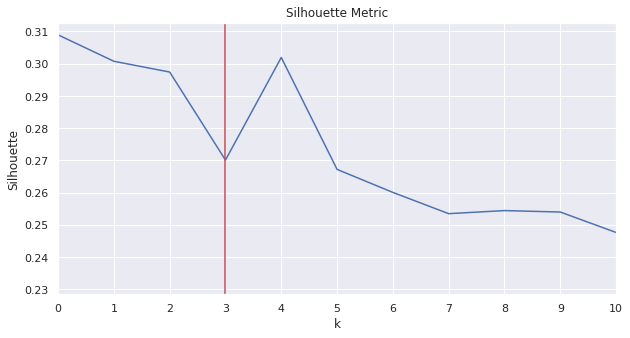

In [22]:
plt.figure(figsize = (10,5))
plt.plot(np.array(silhouette_scores))
plt.xticks(range(0,23,1))
plt.title("Silhouette Metric")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.axvline(3, color = "r")
plt.xlim(0,10)
plt.show()

In [23]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(scaled_dataframe)
features['cluster'] = kmeans.labels_

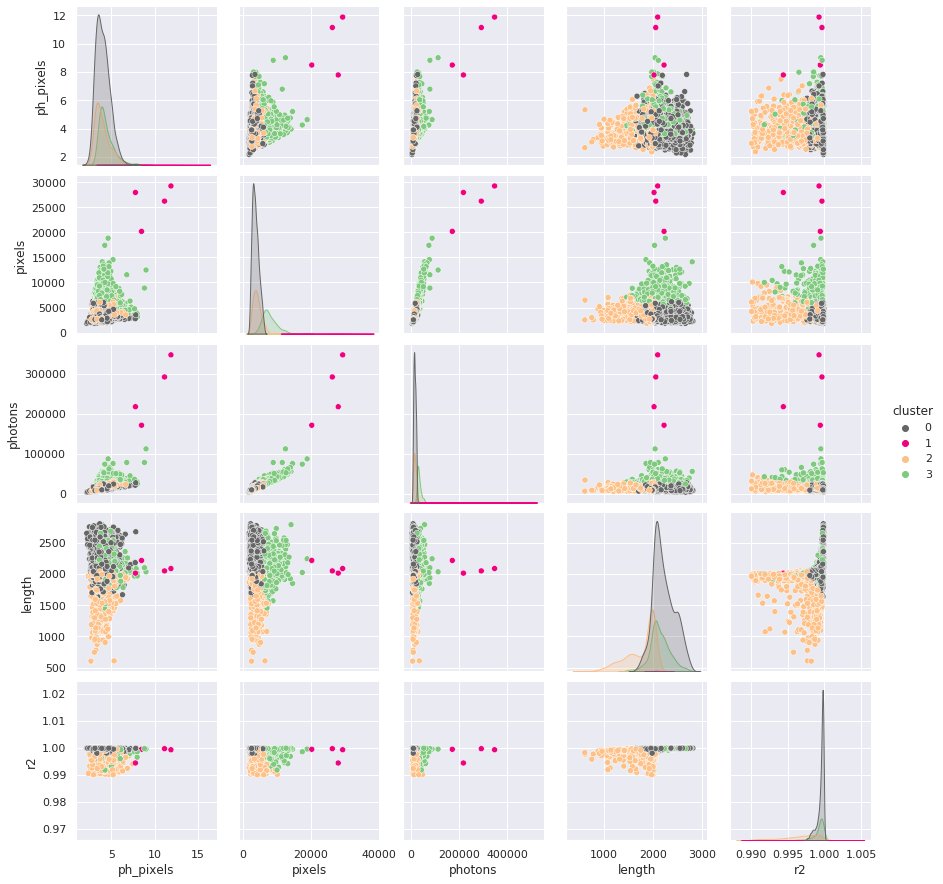

In [24]:
#customPalette = sns.set_palette(sns.color_palette(['#0000FF', '#FF0000', '#00FF00']))
sns.pairplot(data = features, hue = "cluster", palette = "Accent_r")
plt.show()

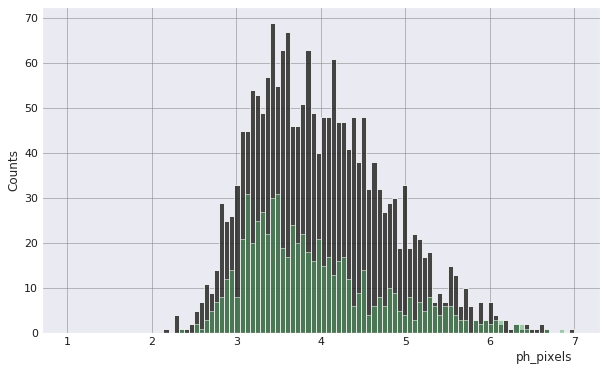

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
from mpl_toolkits.mplot3d import Axes3D

plt.hist(features.ph_pixels[features.cluster==0], bins=100, color='k', alpha=0.8, range=(1, 7))
plt.hist(features.ph_pixels[features.cluster==1], bins=100, color='y', alpha=0.5, range=(1, 7))
plt.hist(features.ph_pixels[features.cluster==2], bins=100, color='g', alpha=0.5, range=(1, 7))
#plt.yscale('Log')
plt.tick_params(axis="both", direction='in', which="both", length=6, width=1, colors='k',
                      grid_color='grey', grid_alpha=0.5)
plt.xlabel('ph_pixels', x=0.9)
plt.ylabel('Counts')
plt.show()

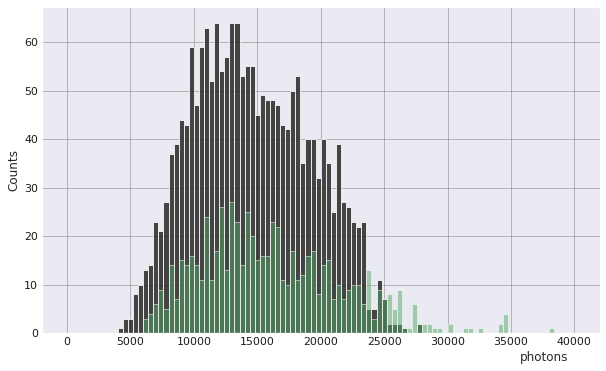

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
from mpl_toolkits.mplot3d import Axes3D

plt.hist(features.photons[features.cluster==0], bins=100, color='k', alpha=0.8, range=(0, 40000))
plt.hist(features.photons[features.cluster==1], bins=100, color='y', alpha=0.5, range=(0, 40000))
plt.hist(features.photons[features.cluster==2], bins=100, color='g', alpha=0.5, range=(0, 40000))
#plt.yscale('Log')
plt.tick_params(axis="both", direction='in', which="both", length=6, width=1, colors='k',
                      grid_color='grey', grid_alpha=0.5)
plt.xlabel('photons', x=0.9)
plt.ylabel('Counts')
plt.show()

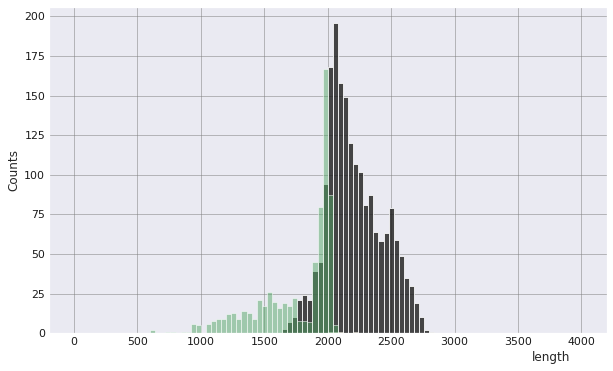

In [27]:
fig, ax = plt.subplots(figsize=(10,6))
from mpl_toolkits.mplot3d import Axes3D

plt.hist(features.length[features.cluster==0], bins=100, color='k', alpha=0.8, range=(0, 4000))
plt.hist(features.length[features.cluster==1], bins=100, color='y', alpha=0.5, range=(0, 4000))
plt.hist(features.length[features.cluster==2], bins=100, color='g', alpha=0.5, range=(0, 4000))
#plt.yscale('Log')
plt.tick_params(axis="both", direction='in', which="both", length=6, width=1, colors='k',
                      grid_color='grey', grid_alpha=0.5)
plt.xlabel('length', x=0.9)
plt.ylabel('Counts')
plt.show()

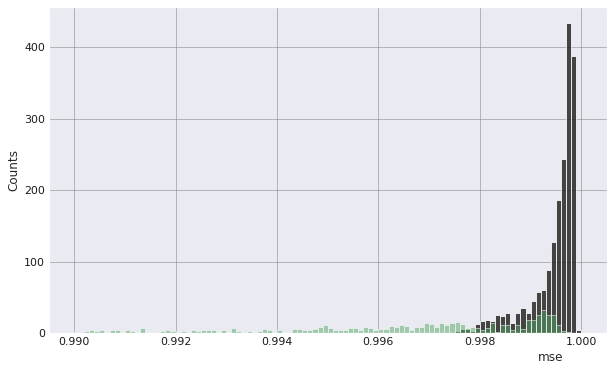

In [28]:
fig, ax = plt.subplots(figsize=(10,6))
from mpl_toolkits.mplot3d import Axes3D

plt.hist(features.r2[features.cluster==0], bins=100, color='k', alpha=0.8, range=(0.99, 1))
plt.hist(features.r2[features.cluster==1], bins=100, color='y', alpha=0.5, range=(0.99, 1))
plt.hist(features.r2[features.cluster==2], bins=100, color='g', alpha=0.5, range=(0.99, 1))
#plt.yscale('Log')00
plt.tick_params(axis="both", direction='in', which="both", length=6, width=1, colors='k',
                      grid_color='grey', grid_alpha=0.5)
plt.xlabel('mse', x=0.9)
plt.ylabel('Counts')
plt.show()

In [29]:

len(features[features.cluster==2])

684

In [30]:
dataRun = run_info_logbook(int(fileInfo.cosmics[0].split('run')[-1]), verbose=True)


File_Number                                        4045
saved_events                                        200
Exposure_Time_ms                                      1
comments                          55Fe - Z = 36-1=35 cm
Nominal_Flux_He_CF4                               60/40
He_CF4                                              NaN
Transfer_field_kV_cm                                2.5
GEM3_V                                              430
GEM2_V                                              440
GEM1_V                                              440
Calculated_GEM_stack_V                             1315
Requested_Drift_field_V_cm                          960
Calculated_Field_Cage_Anode_V                     316.8
Real_Field_Cage_Anode_V                             317
Calculated_Field_Cage_Catode_V                    49632
Calculated_Drift_Field_V_cm                     960.004
Name: 2967, dtype: object


In [31]:
int(dataRun['saved_events'])*float(dataRun['Exposure_Time_ms'])*1e-3

0.2

In [32]:
len(features[features.cluster==2])/(int(dataRun['saved_events'])*float(dataRun['Exposure_Time_ms'])*1e-3)

3360.0